MILESTONE-1

In [0]:
# Databricks Notebook: Netflix Dataset Cleaning & Encoding

# Step 1: Import Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# Step 2: Load Dataset
df = pd.read_csv("/Volumes/workspace/default/netflix_data/netflix_titles.csv")
print("✅ Dataset loaded successfully.")

✅ Dataset loaded successfully.


In [0]:
# Step 3: Remove Duplicate Rows
df = df.drop_duplicates()
print("✅ Duplicate rows removed.")

✅ Duplicate rows removed.


In [0]:
# Step 4: Handle Missing Values
df['country'] = df['country'].fillna("unknown")
df['director'] = df['director'].fillna("Not Available")
df['cast'] = df['cast'].fillna("Not Available")
df['rating'] = df['rating'].fillna("Not Rated")
df['duration'] = df['duration'].fillna("0")
print("✅ Missing values handled.")

✅ Missing values handled.


In [0]:
# Step 5: Strip Extra Spaces from Strings
for col in ['type', 'rating', 'country', 'director', 'listed_in']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
print("✅ Extra spaces removed from object columns.")

✅ Extra spaces removed from object columns.


In [0]:
# Step 6: Remove Special Characters from 'country'
df['country'] = df['country'].str.replace(r'[^a-zA-Z ,]', '', regex=True)
print("✅ Special characters removed from 'country'.")

✅ Special characters removed from 'country'.


In [0]:
# Step 7: Rename Columns (if needed)
df = df.rename(columns={"show_id": "id"})
print("✅ Columns renamed successfully.")


✅ Columns renamed successfully.


In [0]:

# Step 8: Drop Unnecessary Columns (optional)
# Uncomment below to drop 'description' column if desired
# if 'description' in df.columns:
#     df = df.drop(columns=['description'])
print("✅ Optional columns dropped if applied.")

# Step 9: Handle Duplicates Again
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"✅ Removed {before - after} duplicate rows.")

✅ Optional columns dropped if applied.
✅ Removed 0 duplicate rows.


In [0]:
# Step 10: Create a Cleaned Copy and Save
df_cleaned = df.copy()
df_cleaned.to_csv("/Volumes/workspace/default/netflix_data/cleaned_netflix_titles.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_netflix_titles.csv'.")


✅ Cleaned dataset saved as 'cleaned_netflix_titles.csv'.


In [0]:
# Step 11: Encoding 'rating' using LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['rating_encoded'] = label_encoder.fit_transform(df_cleaned['rating'])
print("✅ 'rating' column label encoded.")

✅ Frequency encoding applied to 'country'.


In [0]:
# Step 12: Frequency Encoding for 'country'
if 'country' in df_cleaned.columns:
    country_freq = df_cleaned['country'].value_counts().to_dict()
    df_cleaned['country_encoded'] = df_cleaned['country'].map(country_freq)
    print("✅ Frequency encoding applied to 'country'.")

✅ Frequency encoding applied to 'country'.


In [0]:
# Step 13: Multi-label One-Hot Encoding for Genres
df_cleaned['genres_list'] = df_cleaned['listed_in'].apply(lambda x: [g.strip() for g in str(x).split(',')])
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(
    mlb.fit_transform(df_cleaned['genres_list']),
    columns=mlb.classes_,
    index=df_cleaned.index
)
df_cleaned = pd.concat([df_cleaned, genres_encoded], axis=1)
print("✅ Multi-label one-hot encoding applied to genres.")

✅ Multi-label one-hot encoding applied to genres.


In [0]:

# Step 14: Frequency Encoding for Primary Genre
df_cleaned['primary_genre'] = df_cleaned['listed_in'].apply(lambda x: str(x).split(',')[0].strip())
genre_freq = df_cleaned['primary_genre'].value_counts().to_dict()
df_cleaned['genre_encoded'] = df_cleaned['primary_genre'].map(genre_freq)
print("✅ Frequency encoding applied to primary genre.")


✅ Frequency encoding applied to primary genre.


In [0]:
# Step 15: Save Frequency Encoded Dataset
df_cleaned.to_csv("/Volumes/workspace/default/netflix_data/freq_encoded_netflix_titles.csv", index=False)
print("✅ Frequency encoded dataset saved as 'freq_encoded_netflix_titles.csv'.")

✅ Frequency encoded dataset saved as 'freq_encoded_netflix_titles.csv'.


MILESTONE-1 Completed

MILESTONE-2


In [0]:
# ------------------------------------------------------------
# STEP 1: Import required libraries
# ------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# ------------------------------------------------------------
# STEP 2: Load the cleaned Netflix dataset
# ------------------------------------------------------------
df = pd.read_csv("/Volumes/workspace/default/netflix_data/cleaned_netflix_titles.csv")

# Display first few rows
print(" First 5 rows of the dataset:")
print(df.head())

🔹 First 5 rows of the dataset:
   id  ...                                        description
0  s1  ...  As her father nears the end of his life, filmm...
1  s2  ...  After crossing paths at a party, a Cape Town t...
2  s3  ...  To protect his family from a powerful drug lor...
3  s4  ...  Feuds, flirtations and toilet talk go down amo...
4  s5  ...  In a city of coaching centers known to train I...

[5 rows x 12 columns]


In [0]:
# ------------------------------------------------------------
# STEP 3: Basic dataset info
# ------------------------------------------------------------
print("\n Dataset Info:")
print(df.info())

print("\n Summary Statistics:")
print(df.describe(include='all'))

# ------------------------------------------------------------
# STEP 4: Check for missing and duplicate values
# ------------------------------------------------------------
print("\n Missing Values per Column:")
print(df.isnull().sum())

print("\n Total Duplicate Rows:")
print(df.duplicated().sum())

# ------------------------------------------------------------
# STEP 5: Handle duplicates if any
# ------------------------------------------------------------
df = df.drop_duplicates()
print(" Duplicates removed successfully.")



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8807 non-null   object 
 1   type             8807 non-null   object 
 2   title            8807 non-null   object 
 3   director         8807 non-null   object 
 4   cast             8807 non-null   object 
 5   country          8807 non-null   object 
 6   date_added       8797 non-null   object 
 7   release_year     8807 non-null   int64  
 8   rating           8807 non-null   object 
 9   duration         8807 non-null   object 
 10  listed_in        8807 non-null   object 
 11  description      8807 non-null   object 
 12  duration_mins    8804 non-null   float64
 13  length_category  8807 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 963.4+ KB
None

🔹 Summary Statistics:
          id   type  ... duration_mins length_c

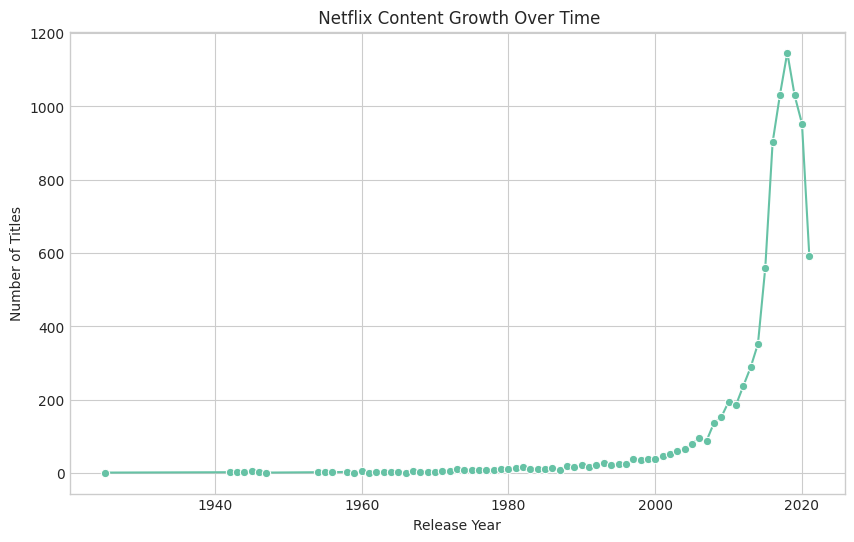

In [0]:

# ------------------------------------------------------------
# STEP 6: Content Growth Over Time
# ------------------------------------------------------------
# Convert 'release_year' to numeric if not already
import warnings
warnings.filterwarnings("ignore")
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Count number of titles per year
content_per_year = df['release_year'].value_counts().sort_index()

# Plot content growth
plt.figure(figsize=(10,6))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker='o')
plt.title(" Netflix Content Growth Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

# ----------------------

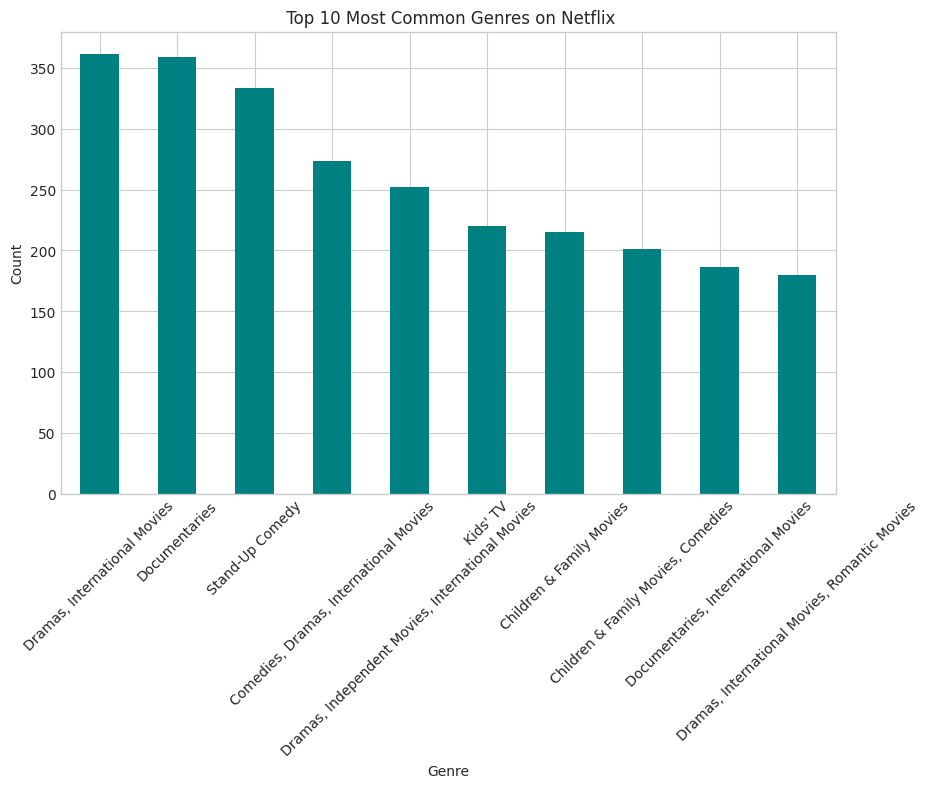

In [0]:
# ------------------------------------------------------------
# STEP 7: Distribution Analysis - Genres
# ------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,6))
df['listed_in'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title(" Top 10 Most Common Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


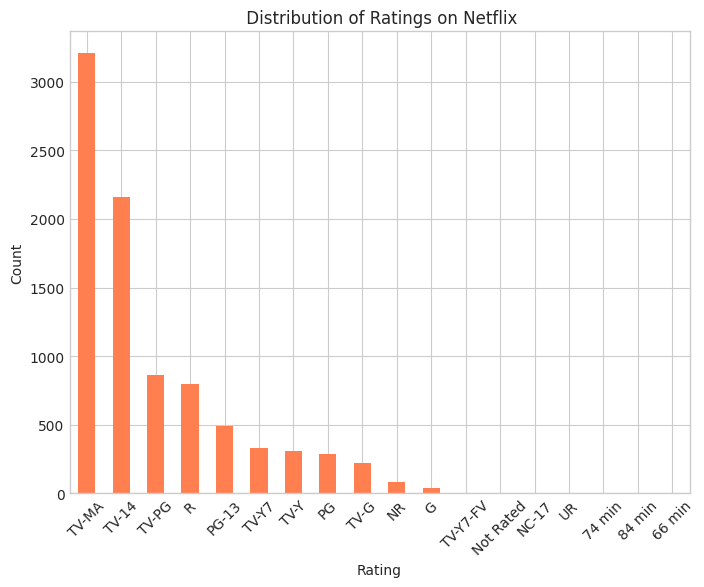

In [0]:
# ------------------------------------------------------------
# STEP 8: Distribution Analysis - Ratings
# ------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8,6))
df['rating'].value_counts().plot(kind='bar', color='coral')
plt.title(" Distribution of Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

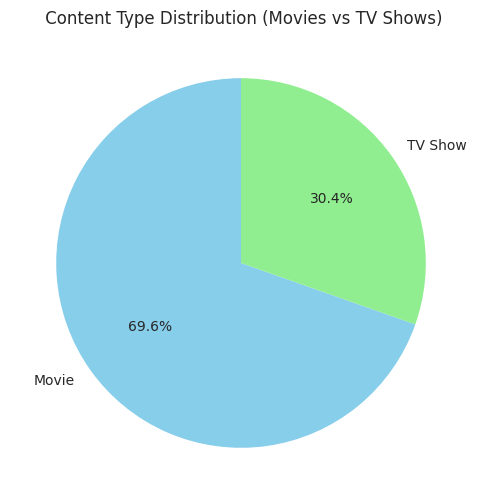

In [0]:
# ------------------------------------------------------------
# STEP 9: Distribution Analysis - Content Type
# ------------------------------------------------------------
plt.figure(figsize=(6,6))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title(" Content Type Distribution (Movies vs TV Shows)")
plt.ylabel("")
plt.show()

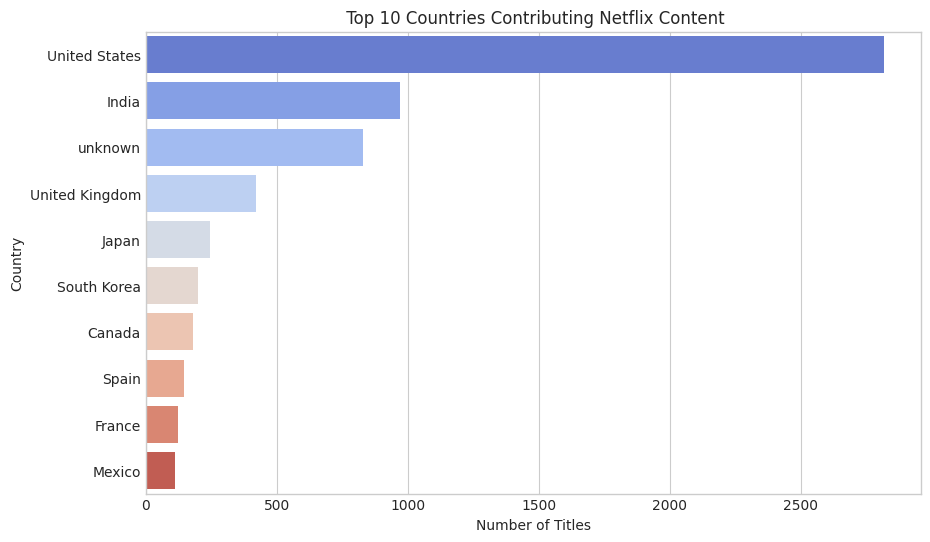

In [0]:

# ------------------------------------------------------------
# STEP 10: Country-Level Analysis
# ------------------------------------------------------------
# Clean up and count country data
import warnings
warnings.filterwarnings("ignore")
df['country'] = df['country'].fillna('Unknown')
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title(" Top 10 Countries Contributing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

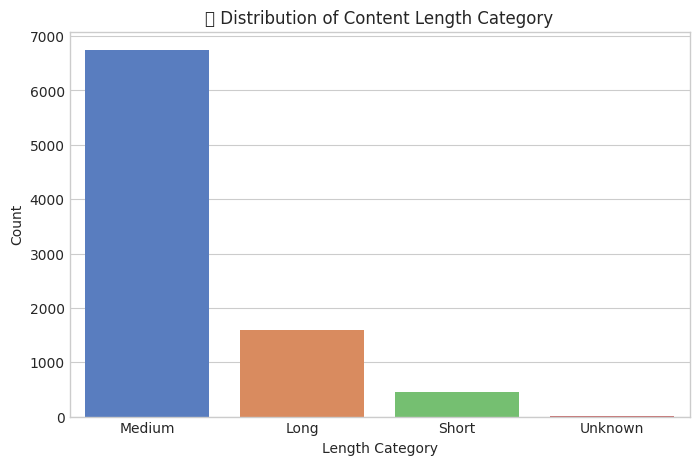

 EDA processed dataset saved successfully!


In [0]:
# ------------------------------------------------------------
# STEP 11: Derived Feature - Content Length Category
# ------------------------------------------------------------
# Convert duration into a uniform numeric format
import warnings
warnings.filterwarnings("ignore")
def get_duration_minutes(x):
    if pd.isna(x):
        return None
    if 'min' in x:
        return int(x.replace('min', '').strip())
    elif 'Season' in x:
        return int(x.split(' ')[0]) * 60  # Approximation
    else:
        return None

df['duration_mins'] = df['duration'].apply(get_duration_minutes)

# Create content length category
def categorize_length(x):
    if pd.isna(x):
        return 'Unknown'
    elif x < 60:
        return 'Short'
    elif x <= 120:
        return 'Medium'
    else:
        return 'Long'

df['length_category'] = df['duration_mins'].apply(categorize_length)

plt.figure(figsize=(8,5))
sns.countplot(x='length_category', data=df, palette='muted')
plt.title("⏱ Distribution of Content Length Category")
plt.xlabel("Length Category")
plt.ylabel("Count")
plt.show()
# ------------------------------------------------------------
# STEP 12: Save processed EDA dataset (optional)
# ------------------------------------------------------------
df.to_csv("/Volumes/workspace/default/netflix_data/eda_processed_netflix.csv", index=False)
print(" EDA processed dataset saved successfully!")


MILESTONE-2 COMPLETED


MILESTONE-3